## News headline sarcasm detection

Given *news headlines*, let's try to predict whether a given headline contains **sarcasm**.

We will use a Tensorflow/Keras text model with word embeddings to make our predictions.

Data source: https://www.kaggle.com/datasets/saurabhbagchi/sarcasm-detection-through-nlp?resource=download

### Getting Started

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_json('archive/Sarcasm_Headlines_Dataset.json', lines=True)
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


### Preprocessing

In [5]:
df = data.copy()

In [6]:
# Drop article_link column
df = df.drop('article_link', axis=1)

In [7]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [8]:
# Split df into X and y
y = df['is_sarcastic']
X = df['headline']

In [9]:
X

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [11]:
X_train

21906       don king enjoys grandilomentitudinous sandwich
24781    vital info on iraqi chemical weapons provided ...
22552    hacker releases new 'orange is the new black' ...
17857                      how boredom can lead to failure
20032                                mind the (gender) gap
                               ...                        
10955    5 ways to outsmart the supermarket and lose we...
17289    reflecting on the aids epidemic this gay men's...
5192     arianna joins payoff to 'reshape' financial se...
12172    rashida jones pays homage to the '90s with 'fl...
235      how to rebuild your credit after bankruptcy --...
Name: headline, Length: 18696, dtype: object

In [12]:
# Create and fit tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

In [13]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'after': 20,
 'out': 21,
 'be': 22,
 'up': 23,
 'how': 24,
 'that': 25,
 'it': 26,
 'as': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'all': 33,
 'just': 34,
 'will': 35,
 'has': 36,
 'he': 37,
 'more': 38,
 'who': 39,
 'into': 40,
 'why': 41,
 'one': 42,
 'report': 43,
 'over': 44,
 'year': 45,
 'donald': 46,
 'have': 47,
 'area': 48,
 'u': 49,
 'can': 50,
 'first': 51,
 's': 52,
 'says': 53,
 'day': 54,
 'woman': 55,
 'time': 56,
 'her': 57,
 'like': 58,
 'off': 59,
 'obama': 60,
 'old': 61,
 'no': 62,
 "trump's": 63,
 'get': 64,
 'life': 65,
 'people': 66,
 'an': 67,
 'make': 68,
 'women': 69,
 'now': 70,
 "'": 71,
 'still': 72,
 'house': 73,
 'was': 74,
 'than': 75,
 'i': 76,
 '5': 77,
 'white': 78,
 'when': 79,
 'my': 80,
 'back': 81,
 'world':

In [15]:
len(tokenizer.word_index)

24845

In [18]:
np.max(list(map(len, tokenizer.texts_to_sequences(X_train))))

np.int64(40)

In [19]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))

    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')

    return sequences

In [22]:
print("Vocab Length:", len(tokenizer.word_index) +1)

Vocab Length: 24846


In [23]:
X_train = get_sequences(X_train, tokenizer=tokenizer, train=True)
X_test = get_sequences(X_test, tokenizer=tokenizer, train=False, max_seq_length=X_train.shape[1])

In [25]:
print("Sequence Length:", X_train.shape[1])

Sequence Length: 40


In [26]:
X_train

array([[ 3579,   481,  1858, ...,     0,     0,     0],
       [ 6496,  4001,     7, ...,     0,     0,     0],
       [ 8490,   343,    11, ...,     0,     0,     0],
       ...,
       [ 4518,  2106, 24841, ...,     0,     0,     0],
       [24843,  1042,  1441, ...,     0,     0,     0],
       [   24,     1,  5280, ...,     0,     0,     0]],
      shape=(18696, 40), dtype=int32)

In [28]:
y_train.value_counts()

is_sarcastic
0    10499
1     8197
Name: count, dtype: int64

### Training

In [29]:
inputs = tf.keras.Input(shape=(40, ))
x = tf.keras.layers.Embedding(
    input_dim = 24846,
    output_dim = 64
)(inputs)

In [30]:
inputs

<KerasTensor shape=(None, 40), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [32]:
x

<KerasTensor shape=(None, 40, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [33]:
x = tf.keras.layers.Flatten()(x)

In [34]:
x

<KerasTensor shape=(None, 2560), dtype=float32, sparse=False, ragged=False, name=keras_tensor_2>

In [35]:
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 40, 64)         │     1,590,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,934,593 (7.38 MB)

 Trainable params: 1,934,593 (7.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.7960 - auc: 0.8886 - loss: 0.4115 - val_accuracy: 0.8631 - val_auc: 0.9343 - val_loss: 0.3257
Epoch 2/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9684 - auc: 0.9950 - loss: 0.0864 - val_accuracy: 0.8406 - val_auc: 0.9167 - val_loss: 0.4367
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9979 - auc: 0.9999 - loss: 0.0076 - val_accuracy: 0.8430 - val_auc: 0.9087 - val_loss: 0.6741
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9997 - auc: 0.9999 - loss: 0.0011 - val_accuracy: 0.8492 - val_auc: 0.9083 - val_loss: 0.6879


### Results

In [37]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: {:.2f}%".format(results[1] * 100))
print("     AUC: {:.5}".format(results[2]))

Accuracy: 85.57%
     AUC: 0.93561


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


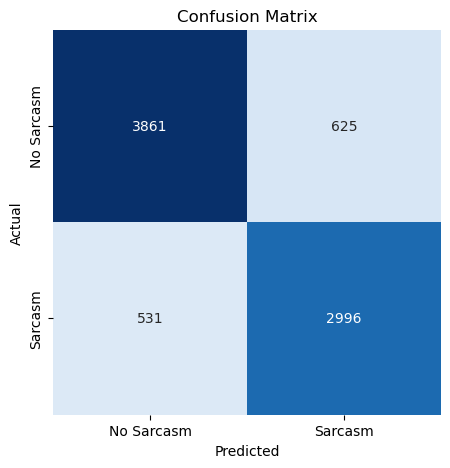

Classification Report:
----------------------------------------
               precision    recall  f1-score   support

  No Sarcasm       0.88      0.86      0.87      4486
     Sarcasm       0.83      0.85      0.84      3527

    accuracy                           0.86      8013
   macro avg       0.85      0.86      0.85      8013
weighted avg       0.86      0.86      0.86      8013



In [42]:
y_pred = np.squeeze(model.predict(X_test) >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=['No Sarcasm', 'Sarcasm'])

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['No Sarcasm', 'Sarcasm'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Sarcasm', 'Sarcasm'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n----------------------------------------\n", clr)